In [1]:
import numpy as np
import pandas as pd
import sklearn
import math
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
csv_data = pd.read_csv("../data/dataviz.csv")
csv_data.head()

,plat,plng,dlat,dlng,t,duration,distance,road
0,46.517116,6.630342,46.508528,6.627598,11:15:00,132.0,1336.0,"[311463563, 2940544168, 311463564, 561463459, ..."
1,46.517116,6.630342,46.521429,6.656347,20:00:00,426.0,3702.0,"[311463563, 2940544168, 311463564, 561463459, ..."
2,46.517116,6.630342,46.558792,6.680104,18:15:00,707.0,8354.0,"[311463563, 2940544168, 311463564, 561463459, ..."
3,46.520649,6.635173,46.519590,6.634718,18:45:00,163.0,1521.0,"[2223091605, 3786724165, 3786724164, 302530573..."
4,46.510731,6.630553,46.515950,6.657525,19:00:00,437.0,3818.0,"[3516999773, 3817926827, 567951313, 567951312,..."


In [140]:
# Get unique destination locations
dlats = list(csv_data['dlat'])
dlngs = list(csv_data['dlng'])
dcoords = np.array(list(zip(plats,plngs)))

d_count = Counter(list(zip(dlats,dlngs)))

# Number of unique destinations
len(d_count)

528

In [141]:
# Extract pickup locations
plats = list(csv_data['plat'])
plngs = list(csv_data['plng'])
pcoords = np.array(list(zip(plats,plngs)))
pcoords.shape

(2000, 2)

In [144]:
# Get unique pickups locations
unique_pickups = list(Counter(list(zip(plats,plngs))))
len(unique_pickups)

32

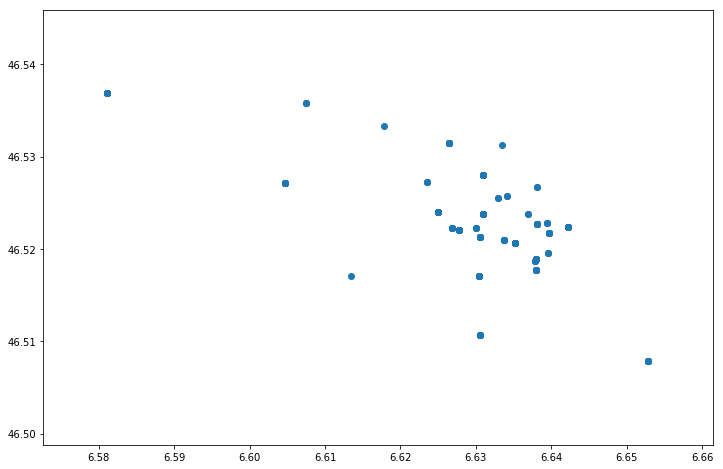

In [133]:
# Plot unique pickup locations
plt.figure(figsize=(12,8))
plt.scatter(plngs,plats)
i = 11
#plt.scatter(unique_coords[i][1],unique_coords[i][0], c='r')
plt.show()

In [135]:
# Prepare dataframe to label each pickup location with the corresponding restaurant
data = [[coord[0], coord[1], nb] for (coord, nb) in count.items()]
data = sorted(data, key=lambda x: x[2], reverse=True)
index = range(len(count))
columns = ['plat', 'plang', 'nb_pickups']

restaurants = pd.Series(['?']*32, index=index)
pickups_df_init = pd.DataFrame(data, index, columns)
pickups_df_init['restaurant'] = restaurants
pickups_df_init.head()

,plat,plang,nb_pickups,restaurant
0,46.520649,6.635173,995,?
1,46.517116,6.630342,390,?
2,46.522014,6.627691,171,?
3,46.518914,6.637912,81,?
4,46.521701,6.639626,63,?


In [148]:
# Label each pickup location with the corresponding restaurant 
pickups_df = pickups_df_init.copy()
pickups_df.loc[1, 'restaurant'] = 'Subway'

pickups_df.loc[4, 'restaurant'] = 'Zooburger (L\'Ours)'
pickups_df.loc[5, 'restaurant'] = 'Zooburger (Mon Loisir)'
pickups_df.loc[6, 'restaurant'] = 'Le Duo Thai & Sushi'
pickups_df.loc[7, 'restaurant'] = 'Burger King'
pickups_df.loc[8, 'restaurant'] = 'Viita Food'

pickups_df.loc[13, 'restaurant'] = 'Bambou Sushi Bar'


pickups_df.loc[27, 'restaurant'] = 'Le Mondial'



pickups_df

,plat,plang,nb_pickups,restaurant
0,46.520649,6.635173,995,?
1,46.517116,6.630342,390,Subway
2,46.522014,6.627691,171,?
3,46.518914,6.637912,81,?
4,46.521701,6.639626,63,Zooburger (L'Ours)
5,46.510731,6.630553,55,Zooburger (Mon Loisir)
6,46.522426,6.642152,36,Le Duo Thai & Sushi
7,46.521329,6.630481,30,Burger King
8,46.523953,6.625008,24,Viita Food
9,46.522719,6.638150,19,?


In [151]:
# Save pickups dataframe
pickups_df.to_csv('../data/unique_pickups.csv', sep=',')

In [30]:
pickups_df = pd.read_csv("../data/unique_pickups.csv")
pickups_df = pickups_df.rename(columns={'plang': 'plng'})
pickups_df = pickups_df[['plat', 'plng', 'nb_pickups', 'restaurant']]
pickups_df.head(10)

,plat,plng,nb_pickups,restaurant
0,46.520649,6.635173,995,?
1,46.517116,6.630342,390,Subway
2,46.522014,6.627691,171,?
3,46.518914,6.637912,81,?
4,46.521701,6.639626,63,Zooburger (L'Ours)
5,46.510731,6.630553,55,Zooburger (Mon Loisir)
6,46.522426,6.642152,36,Le Duo Thai & Sushi
7,46.521329,6.630481,30,Burger King
8,46.523953,6.625008,24,Viita Food
9,46.522719,6.638150,19,?


In [49]:
'['+(", ".join([str(i) for i in ids]))+']'

'3, 5, 7, 10, 13, 15, 17, 24, 25, 27, 28, 30, 32, 33, 34, 36, 37, 38, 39, 40, 42, 44, 45, 47, 48, 51, 55, 56, 57, 59, 61, 62, 63, 66, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 82, 83, 84, 85, 90, 93, 96, 97, 98, 101, 102, 104, 107, 109, 110, 111, 113, 117, 118, 120, 124, 125, 126, 130, 131, 132, 134, 135, 136, 137, 139, 140, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 159, 160, 161, 162, 164, 165, 168, 169, 170, 171, 172, 173, 175, 176, 177, 183, 184, 185, 187, 192, 193, 197, 198, 201, 202, 203, 208, 210, 211, 214, 215, 216, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 233, 234, 235, 237, 238, 241, 242, 243, 249, 250, 255, 256, 258, 260, 262, 263, 264, 265, 266, 268, 270, 271, 272, 273, 275, 281, 282, 283, 287, 289, 290, 291, 295, 298, 301, 302, 304, 307, 309, 310, 316, 318, 319, 321, 325, 326, 327, 328, 329, 332, 333, 335, 336, 338, 342, 344, 345, 346, 348, 349, 353, 358, 360, 361, 362, 363, 365, 366, 367, 368, 372, 373, 375, 379, 381, 384, 385, 386, 387, 388, 392, 393, 

In [50]:
# Add path ids for each restaurant
rest_loc = pickups_df.apply(lambda row: (row['plat'], row['plng']), axis=1)
paths_ids = []
for (plat, plng) in rest_loc:
    ids = csv_data[(csv_data['plat']==plat) & (csv_data['plng']==plng)].index.values
    paths_ids.append('['+(", ".join([str(i) for i in ids]))+']')
    
pickups_df['paths_ids'] = pd.Series(paths_ids)
pickups_df

,plat,plng,nb_pickups,restaurant,paths_ids
0,46.520649,6.635173,995,?,"[3, 5, 7, 10, 13, 15, 17, 24, 25, 27, 28, 30, ..."
1,46.517116,6.630342,390,Subway,"[0, 1, 2, 6, 9, 12, 14, 22, 26, 29, 41, 43, 46..."
2,46.522014,6.627691,171,?,"[21, 81, 86, 92, 114, 121, 129, 138, 141, 156,..."
3,46.518914,6.637912,81,?,"[8, 35, 53, 67, 106, 112, 122, 167, 182, 189, ..."
4,46.521701,6.639626,63,Zooburger (L'Ours),"[91, 294, 313, 314, 320, 370, 443, 447, 448, 4..."
5,46.510731,6.630553,55,Zooburger (Mon Loisir),"[4, 20, 99, 205, 246, 254, 343, 356, 371, 391,..."
6,46.522426,6.642152,36,Le Duo Thai & Sushi,"[58, 75, 311, 317, 401, 505, 517, 523, 547, 56..."
7,46.521329,6.630481,30,Burger King,"[128, 261, 296, 297, 300, 352, 423, 507, 588, ..."
8,46.523953,6.625008,24,Viita Food,"[204, 286, 383, 433, 470, 527, 714, 779, 931, ..."
9,46.522719,6.638150,19,?,"[95, 143, 144, 476, 510, 650, 696, 809, 928, 9..."


In [51]:
# Save pickups dataframe
pickups_df.to_csv('../data/restaurants.csv', index=False)

-----------------------------------------------------

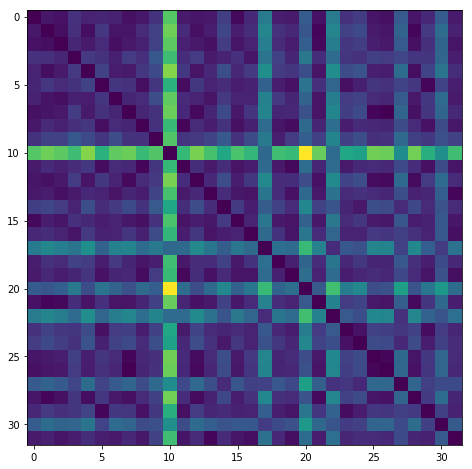

In [145]:
def get_dist(coord1, coord2):
    diff = (coord1[0]-coord2[0], coord1[1]-coord2[1])
    dist = math.sqrt(diff[0]**2 + diff[1]**2)
    return dist

def dist_matrix(coords, log_dist=False):
    dist_mat = np.zeros((len(coords),len(coords)))
    
    for i,coord in enumerate(coords):
        for j,coord in enumerate(coords):
            dist = get_dist(coords[i], coords[j])
            
            if log_dist:
                dist_mat[i,j] = math.log(1+dist)
            else:
                dist_mat[i,j] = dist
            
    return dist_mat

dist_mat = dist_matrix(unique_pickups, log_dist=True)
plt.figure(figsize=(8,8))
plt.imshow(dist_mat)
plt.show()